In [9]:
from rmgpy import settings
from rmgpy.data.kinetics.database import KineticsDatabase
from rmgpy.data.base import DatabaseError
import numpy
from rmgpy.molecule.molecule import Molecule
from rmgpy.data.rmg import RMGDatabase
from rmgpy.rmg.react import findDegeneracies, reduceSameReactantDegeneracy, react, reactSpecies, _labelListOfSpecies
from rmgpy.data.base import ForbiddenStructures
from rmgpy.species import Species
import os
from IPython.display import display

In [2]:
database = RMGDatabase()
database.load(
    path=os.path.join(settings['test_data.directory'], 'testing_database'),
    thermoLibraries=['primaryThermoLibrary'],
    reactionLibraries=['GRI-Mech3.0'],
    kineticsFamilies=[
        'intra_H_migration'
    ],
    testing=True,
    depository=False,
    solvation=False,
)
#load empty forbidden structures to avoid any dependence on forbidden structures
#for these tests
for family in database.kinetics.families.values():
    family.forbidden = ForbiddenStructures()
database.forbiddenStructures = ForbiddenStructures()

# Prepare the database by loading training reactions and averaging the rate rules
for family in database.kinetics.families.values():
    family.addKineticsRulesFromTrainingSet(thermoDatabase=database.thermo)
    family.fillKineticsRulesByAveragingUp(verbose=True)

In [5]:
family = database.kinetics.families.values()[0]

In [13]:
from rmgpy.rmg.react import findDegeneracies,reactSpecies

## try findDegeneracies

In [6]:
react_mol = Molecule().fromSMILES('C1C(=O)CCC1O[O]')

In [8]:
reactions = family.generateReactions(reactants=[react_mol])

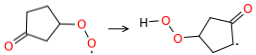

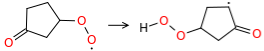

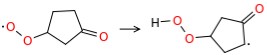

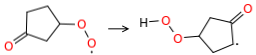

In [12]:
for rxn in reactions:
    display(rxn)

In [14]:
findDegeneracies(rxnList=reactions)

[TemplateReaction(reactants=[Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")])], products=[Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")])], duplicate=True, degeneracy=2.0, pairs=[[Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")]), Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")])]], family='intra_H_migration', template=['R5H', 'O_rad_out', 'Cs_H_out']),
 TemplateReaction(reactants=[Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")])], products=[Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")])], duplicate=True, degeneracy=2.0, pairs=[[Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")]), Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")])]], family='intra_H_migration', template=['R6H', 'O_rad_out', 'Cs_H_out'])]

## try reactSpecies

In [16]:
react_spec = Species(molecule=[react_mol])

In [17]:
reactSpecies((react_spec,))

[TemplateReaction(reactants=[Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")])], products=[Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")])], duplicate=True, degeneracy=2.0, pairs=[(Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")]), Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")]))], family='intra_H_migration', template=['R5H', 'O_rad_out', 'Cs_H_out']),
 TemplateReaction(reactants=[Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")])], products=[Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")])], duplicate=True, degeneracy=2.0, pairs=[(Species(label="", molecule=[Molecule(SMILES="[O]OC1CCC(=O)C1")]), Species(label="", molecule=[Molecule(SMILES="O=C1[CH]CC(C1)OO"), Molecule(SMILES="[O]C1=CCC(C1)OO")]))], family='intra_H_migration', template=['R6H', 'O_rad_out', 'Cs_H_out'])]